In [7]:
using Plots

using NBInclude
@nbinclude("localsearch.ipynb")
@nbinclude("testing_RM.ipynb")


In [8]:
n = 5
x = 4

max_dcj_dist = n + x

target = generate_target_with_xdup(n, x)
src = scramble_target(target)

total_maps = 5
rand_maps = 3
max_neighbors = 2

mode = "none"
dupchar_to_unique_chars = OrderedDict{Char, Vector{Char}}()
min_change_neighbor = true 


_, _, _, _, _, diffs_MCN = localsearch(src, target, total_maps, rand_maps, max_neighbors, mode, dupchar_to_unique_chars, min_change_neighbor)
_, _, _, _, _, diffs_OLD = localsearch(src, target, total_maps, rand_maps, max_neighbors, mode, dupchar_to_unique_chars, !min_change_neighbor)

SRC aaaeacd,c,b --> TARGET aaabccdae
total maps=5 || num_rand_maps=3 || max_neighbors=2


SRC aaaeacd,c,b --> TARGET aaabccdae
total maps=5 || num_rand_maps=3 || max_neighbors=2




(4, [21, 1], "znaekcd,o,b", Dict([22, 1] => ("znkeacd,o,b", 4), [21, 1] => ("znaekcd,o,b", 4), [21, 2] => ("znaekod,c,b", 4), [3, 2] => ("aknezod,c,b", 6), [15, 2] => ("knaezod,c,b", 6)), Dict([21, 1] => ("znaekcd,o,b", 4), [3, 2] => ("aknezod,c,b", 6), [15, 2] => ("knaezod,c,b", 6)), [0, 0])

SRC aaaeacd,c,b --> TARGET aaabccdae
total maps=5 || num_rand_maps=3 || max_neighbors=2


SRC aaaeacd,c,b --> TARGET aaabccdae
total maps=5 || num_rand_maps=3 || max_neighbors=2


max dcj dist=9max dcj dist=9

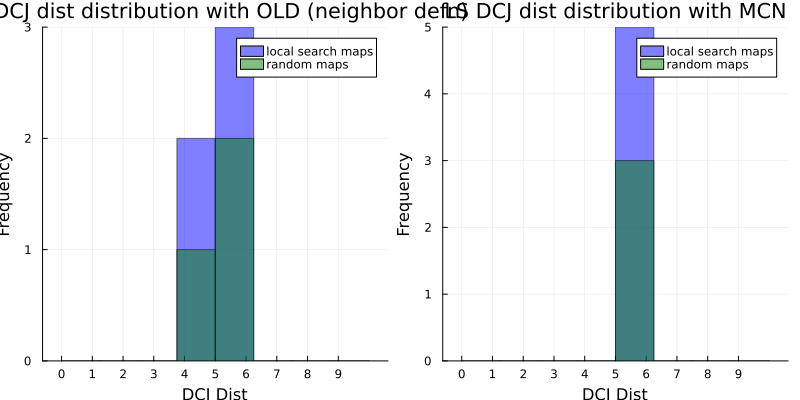

In [27]:
min_dcj_MCN, _, _, map_to_dedupstr_dcjdist_MCN, og_rm_MCN, _ = localsearch(src, target, total_maps, rand_maps, max_neighbors, mode, dupchar_to_unique_chars, min_change_neighbor)
min_dcj_OLD, _, _, map_to_dedupstr_dcjdist_OLD, og_rm_OLD, _ = localsearch(src, target, total_maps, rand_maps, max_neighbors, mode, dupchar_to_unique_chars, !min_change_neighbor)


# old neighbor def 
rm_dcj_dists = [tupl[2] for tupl in values(og_rm_OLD)]
dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist_OLD)]
print("max dcj dist=", max_dcj_dist)

xticks = collect(0:max_dcj_dist)
bins_range = range(0, maximum(max_dcj_dist)+1, maximum(max_dcj_dist))
h1 = histogram(dcjdists, xticks=xticks, bins=bins_range, title="LS DCJ dist distribution with OLD (neighbor defn)", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)
histogram!(h1, rm_dcj_dists, xticks=xticks, bins=bins_range, label="random maps", alpha=0.5, color=:green)

# min change neighbor defn
rm_dcj_dists = [tupl[2] for tupl in values(og_rm_MCN)]
dcjdists = [tupl[2] for tupl in values(map_to_dedupstr_dcjdist_MCN)]
print("max dcj dist=", max_dcj_dist)
    
xticks = collect(0:max_dcj_dist)
bins_range = range(0, maximum(max_dcj_dist)+1, maximum(max_dcj_dist))
h2 = histogram(dcjdists, xticks=xticks, bins=bins_range, title="LS DCJ dist distribution with MCN", label="local search maps", xlabel="DCJ Dist", ylabel="Frequency", alpha=0.5, color=:blue)
histogram!(h2, rm_dcj_dists, xticks=xticks, bins=bins_range, label="random maps", alpha=0.5, color=:green)

# plot 
plot(h1, h2, layout=(1, 2), size=(800, 400))